# Tutorial on ProfileHistogram

In [1]:
from matplotlib import pyplot as plt
import poisson_approval as pa

## Profile

Generate a random profile:

In [2]:
generator_profile = pa.GeneratorProfileHistogramUniform(n_bins = 10)
profile = generator_profile()
profile

<abc: 0.2024301929990251 [0.00169112 0.30094337 0.05623127 0.08430518 0.28065703 0.06203373
 0.0483658  0.01365565 0.01980354 0.13231332], acb: 0.15878931985890854 [0.0249386  0.13262261 0.10804939 0.06407001 0.05360461 0.07584126
 0.07028921 0.17259369 0.13098232 0.16700829], bac: 0.2701446745394197 [0.13402201 0.07724262 0.06075399 0.00355272 0.37710682 0.02704885
 0.04678536 0.12419629 0.03501846 0.11427288], bca: 0.13181095652839792 [0.04636073 0.1171943  0.00528462 0.02242771 0.02904048 0.00148519
 0.16329987 0.1828835  0.14800644 0.28401717], cab: 0.12448597281456542 [0.04506608 0.10026943 0.0453203  0.11482289 0.00792083 0.43448789
 0.0416861  0.03933063 0.08620383 0.08489202], cba: 0.11233888325968333 [0.32497523 0.01437763 0.04904627 0.03221749 0.00734958 0.07567029
 0.17272358 0.00369146 0.20084372 0.11910477]> (Condorcet winner: b)

Share of each ranking:

In [3]:
profile.d_ranking_share

{abc: 0.2024301929990251, acb: 0.15878931985890854, bac: 0.2701446745394197, bca: 0.13181095652839792, cab: 0.12448597281456542, cba: 0.11233888325968333}

Distribution of the utilities for voters $abc$:

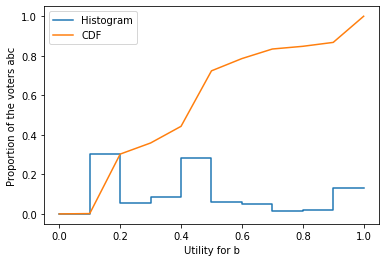

In [4]:
ranking = 'abc'
profile.plot_histogram(ranking, label='Histogram')
profile.plot_cdf(ranking, label='CDF')
plt.ylabel('Proportion of the voters %s' % ranking)
plt.legend()

## Strategic Analysis

Generate a random strategy:

In [5]:
generator_strategy = pa.GeneratorStrategyThresholdUniform()
strategy = generator_strategy()
strategy

<abc: utility-dependent (0.9195945446854554), acb: utility-dependent (0.4309132226986997), bac: utility-dependent (0.1309348375132846), bca: utility-dependent (0.7249868732746428), cab: utility-dependent (0.5177328535858804), cba: utility-dependent (0.15081188520544975)>

Tau vector (ballot shares) associated to the strategy in the given profile:

In [6]:
tau = profile.tau(strategy)
tau

<a: 0.23587527092165472, ab: 0.2490202345001132, ac: 0.17968911904625995, b: 0.09944321687072565, bc: 0.15003897833147792, c: 0.0859331803297686> ==> a

Is the strategy an equilibrium for the given profile?

In [7]:
profile.is_equilibrium(strategy)

EquilibriumStatus.NOT_EQUILIBRIUM

Use iterated voting to search for an equilibrium:

In [8]:
result = profile.iterated_voting(strategy_ini=strategy, n_max_episodes=1000, 
                                 ballot_update_ratio=0.1)
cycle_taus_actual = result['cycle_taus_actual']
cycle_strategies = result['cycle_strategies']

In [9]:
cycle_taus_actual

[<a: 0.25451892266459714, ac: 0.23118656300790202, b: 0.29993169730049374, bc: 0.2143628170270075> ==> b]

In [10]:
if len(cycle_taus_actual) == 0:
    print('No convergence.')
elif len(cycle_taus_actual) == 1:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % cycle_strategies[0])
    print('Limit tau-vector: %s' % cycle_taus_actual[0])
else:
    print('Convergence to a cycle of cardinality %s.' % len(cycle_taus_actual))

Convergence to an equilibrium.
Limit strategy: <abc: a, acb: utility-dependent (0.39743424317772597), bac: b, bca: utility-dependent (0.602565756822274), cab: ac, cba: bc> ==> b
Limit tau-vector: <a: 0.25451892266459714, ac: 0.23118656300790202, b: 0.29993169730049374, bc: 0.2143628170270075> ==> b


There is another version of iterated voting, ``fictitious_play``. It allows for update ratios that depend on time, it is faster, but it is not able to detect limit cycles (only convergence). Cf. Reference section for more information.

In [11]:
from math import log
result = profile.fictitious_play(strategy_ini=strategy, n_max_episodes=1000, 
                                 perception_update_ratio=lambda t: 1 / log(t + 2),
                                 ballot_update_ratio=0.1)
limit_tau = result['tau']
limit_strategy = result['strategy']

d:\github\poisson_approval\poisson_approval\tau_vector\TauVector.py:183: UserWarning: Warning: tau is not normalized, I will normalize it.
  warnings.warn("Warning: tau is not normalized, I will normalize it.")


In [12]:
if limit_tau is None:
    print('No convergence.')
else:
    print('Convergence to an equilibrium.')
    print('Limit strategy: %s' % limit_strategy)
    print('Limit tau-vector: %s' % limit_tau)

Convergence to an equilibrium.
Limit strategy: <abc: a, acb: utility-dependent (0.3974342431774816), bac: b, bca: utility-dependent (0.6025657568225186), cab: ac, cba: bc> ==> b
Limit tau-vector: <a: 0.25451892266457243, ac: 0.23118656300792664, b: 0.2999316973005462, bc: 0.21436281702695476> ==> b
